Data Science

Use Pandas for data-frame cleaning, manipulation and analysis. Show the findings by choosing different types of visualization in Matplotlib and Seaborn. Use Scipy, Stats and Numpy for statistical analysis. The data-set is  Seattle Crime Data Coding Challenge.

In [129]:
import matplotlib.pyplot as plt
import scipy.stats as sp
import seaborn as sns
import pandas as pd
import numpy as np

In [130]:
df = pd.read_csv("34262_921407_bundle_archive/seattle-crime-stats-by-police-precinct-2008-present.csv")

In [131]:
df.head(10)

,Police Beat,CRIME_TYPE,CRIME_DESCRIPTION,STAT_VALUE,REPORT_DATE,Sector,Precinct,Row_Value_ID
0,R2,Rape,Rape,1,2014-04-30T00:00:00.000,R,SE,27092
1,K2,Assault,Assault,5,2014-04-30T00:00:00.000,K,W,26506
2,M2,Homicide,Homicide,1,2014-04-30T00:00:00.000,M,W,27567
3,C3,Robbery,Robbery,2,2014-04-30T00:00:00.000,C,E,26225
4,E2,Motor Vehicle Theft,"Vehicle Theft is theft of a car, truck, motorc...",7,2014-04-30T00:00:00.000,E,E,26368
5,S3,Burglary,Burglary,11,2014-04-30T00:00:00.000,S,SE,27237
6,G3,Assault,Assault,1,2014-04-30T00:00:00.000,G,E,26422
7,R3,Homicide,Homicide,0,2014-04-30T00:00:00.000,R,SE,27119
8,O1,Rape,Rape,1,2014-04-30T00:00:00.000,O,SE,26588
9,W3,Burglary,Burglary,6,2014-04-30T00:00:00.000,W,SW,27349


Looking at the data we see that we have a a few things that won't be useful like Police beat, sector, row id, and description. So lets remove those.

In [132]:
df = df.drop(columns=['Police Beat', 'CRIME_DESCRIPTION', 'Sector', 'Row_Value_ID'])

In [133]:
df

,CRIME_TYPE,STAT_VALUE,REPORT_DATE,Precinct
0,Rape,1,2014-04-30T00:00:00.000,SE
1,Assault,5,2014-04-30T00:00:00.000,W
2,Homicide,1,2014-04-30T00:00:00.000,W
3,Robbery,2,2014-04-30T00:00:00.000,E
4,Motor Vehicle Theft,7,2014-04-30T00:00:00.000,E
...,...,...,...,...
27120,Homicide,0,2008-01-01T00:00:00.000,N
27121,Burglary,15,2008-01-01T00:00:00.000,N
27122,Motor Vehicle Theft,4,2008-01-01T00:00:00.000,N
27123,Larceny-Theft,35,2008-01-01T00:00:00.000,N


Lets drop any nan values as well

In [134]:
df = df.dropna()

And explore the data a bit.

In [135]:
print(min(df['STAT_VALUE']), max(df['STAT_VALUE']))

-3 137


In [136]:
df[df['STAT_VALUE'] <= -1].head()

,CRIME_TYPE,STAT_VALUE,REPORT_DATE,Precinct
2191,Rape,-1,2013-10-01T00:00:00.000,N
2351,Rape,-1,2013-10-01T00:00:00.000,E
2393,Rape,-1,2013-10-01T00:00:00.000,E
2541,Rape,-1,2013-09-01T00:00:00.000,SW
2898,Assault,-1,2013-08-01T00:00:00.000,E


Since stat values are the amount of reported crimes a negative value does not make much sense. LET'S REMOVE THEM!

In [137]:
df = df[df['STAT_VALUE'] >= 1]

We want to see data that shows when a crime was reported, so I removed the data that has 0 or less crimes reported. Lets look at the types of crimes reported

In [138]:
print(df['CRIME_TYPE'].unique())

['Rape' 'Assault' 'Homicide' 'Robbery' 'Motor Vehicle Theft' 'Burglary'
 'Larceny-Theft']


How about the total amount of each crime reported?

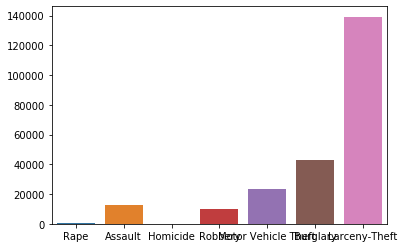

In [140]:
sns.barplot(x=df['CRIME_TYPE'].unique(), y=[df[df['CRIME_TYPE'] == c_type]['STAT_VALUE'].sum() for c_type in df['CRIME_TYPE'].unique()])


It looks like larceny-theft and burgalry are the most common reported crimes

Lets see how many times each crime is typically reported

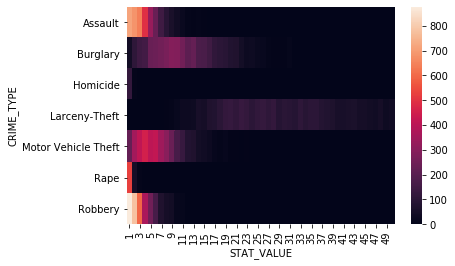

In [141]:
sns.heatmap(pd.crosstab(df['CRIME_TYPE'], df[(df['STAT_VALUE'] <= 50) & (df['STAT_VALUE'] >= 1)]['STAT_VALUE']))
plt.show()

We can see that larceny-theft and burgalry have larger distributions than the others witch seem to be consistantly reported a limited amount of times.

In [142]:
print(df['REPORT_DATE'].unique())

['2014-04-30T00:00:00.000' '2014-03-30T00:00:00.000'
 '2014-02-28T00:00:00.000' '2014-01-30T00:00:00.000'
 '2013-12-01T00:00:00.000' '2013-11-01T00:00:00.000'
 '2013-10-01T00:00:00.000' '2013-09-01T00:00:00.000'
 '2013-08-01T00:00:00.000' '2013-07-01T00:00:00.000'
 '2013-06-01T00:00:00.000' '2013-05-01T00:00:00.000'
 '2013-04-01T00:00:00.000' '2013-03-01T00:00:00.000'
 '2013-02-01T00:00:00.000' '2013-01-01T00:00:00.000'
 '2012-12-01T00:00:00.000' '2012-11-01T00:00:00.000'
 '2012-10-01T00:00:00.000' '2012-09-01T00:00:00.000'
 '2012-08-01T00:00:00.000' '2012-07-01T00:00:00.000'
 '2012-06-01T00:00:00.000' '2012-05-01T00:00:00.000'
 '2012-04-01T00:00:00.000' '2012-03-01T00:00:00.000'
 '2012-02-01T00:00:00.000' '2012-01-01T00:00:00.000'
 '2011-12-01T00:00:00.000' '2011-11-01T00:00:00.000'
 '2011-10-01T00:00:00.000' '2011-09-01T00:00:00.000'
 '2011-08-01T00:00:00.000' '2011-07-01T00:00:00.000'
 '2011-06-01T00:00:00.000' '2011-05-01T00:00:00.000'
 '2011-04-01T00:00:00.000' '2011-03-01T00:00:0

It looks like its kept track of on a monthly basis, lets see if there are any time based trends

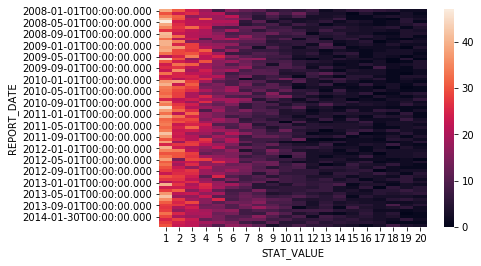

In [143]:
sns.heatmap(pd.crosstab(df['REPORT_DATE'], df[(df['STAT_VALUE'] <= 20) & (df['STAT_VALUE'] >= 1)]['STAT_VALUE']))

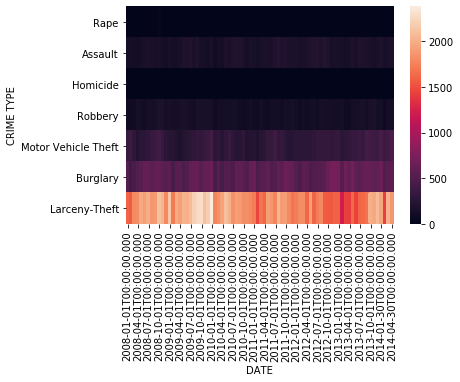

In [153]:
dates_dict = {}
for date in reversed(df['REPORT_DATE'].unique()):
    dates_numbers = []
    for crime in df['CRIME_TYPE'].unique():
        dates_numbers.append(df[(df['REPORT_DATE'] == date) & (df['CRIME_TYPE'] == crime)]['STAT_VALUE'].sum())
    dates_dict[date] = dates_numbers
new_df = pd.DataFrame(dates_dict, df['CRIME_TYPE'].unique())
new_df = new_df.rename_axis('DATE', axis='columns')
new_df = new_df.rename_axis('CRIME TYPE')
sns.heatmap(new_df)

To me it doesn't look like there are any time based trends, it looks like it pretty consistent. Lets see by precinct.

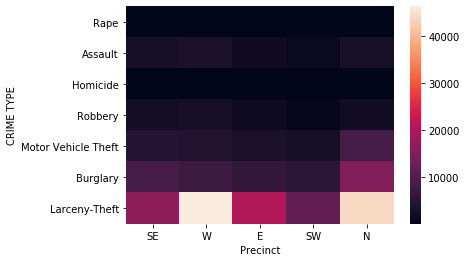

In [154]:
loc_dict = {}
for loc in df['Precinct'].unique():
    loc_numbers = []
    for crime in df['CRIME_TYPE'].unique():
        loc_numbers.append(df[(df['Precinct'] == loc) & (df['CRIME_TYPE'] == crime)]['STAT_VALUE'].sum())
    loc_dict[loc] = loc_numbers
new_df = pd.DataFrame(loc_dict, df['CRIME_TYPE'].unique())
new_df = new_df.rename_axis('Precinct', axis='columns')
new_df = new_df.rename_axis('CRIME TYPE')
sns.heatmap(new_df)

It looks like there are the majority of crimes being larceny-theft happening in the W and N precincts. Lets see if there are any time based trends in total crime in each precinct.

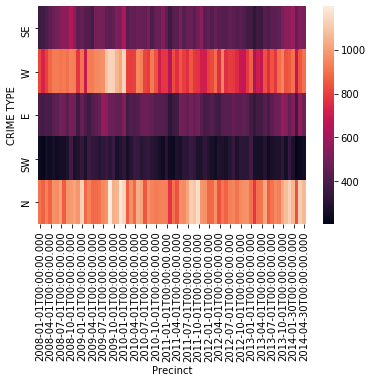

In [155]:
dates_dict = {}
for date in reversed(df['REPORT_DATE'].unique()):
    dates_numbers = []
    for pre in df['Precinct'].unique():
        dates_numbers.append(df[(df['REPORT_DATE'] == date) & (df['Precinct'] == pre)]['STAT_VALUE'].sum())
    dates_dict[date] = dates_numbers
new_df = pd.DataFrame(dates_dict, df['Precinct'].unique())
new_df = new_df.rename_axis('Precinct', axis='columns')
new_df = new_df.rename_axis('CRIME TYPE')
sns.heatmap(new_df)

It looks like there are bands where crime increased in one or more precincts during certain times. I don't know if that correlates to certain events but its possible...